In [ ]:
pip install opendatasets

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: binojmadhuranga
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andonians/random-linear-regression


100%|██████████| 7.63k/7.63k [00:00<00:00, 9.01MB/s]

In [ ]:
data = pd.read_csv("random-linear-regression/test.csv")

**Data Preprocessing**

In [ ]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [ ]:
data.shape

(300, 2)

In [ ]:
X = data["x"]
y = data["y"]

In [ ]:
X

,x
0,77
1,21
2,22
3,20
4,36
...,...
295,71
296,46
297,55
298,62


In [ ]:
y

,y
0,79.775152
1,23.177279
2,25.609262
3,17.857388
4,41.849864
...,...
295,68.545888
296,47.334876
297,54.090637
298,63.297171


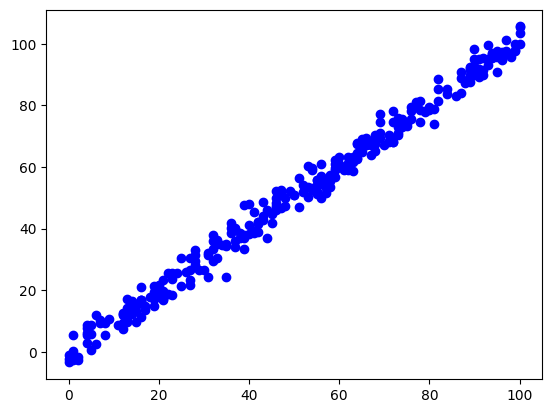

In [ ]:
plt.scatter(X, y, c='b')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((240,), (60,))

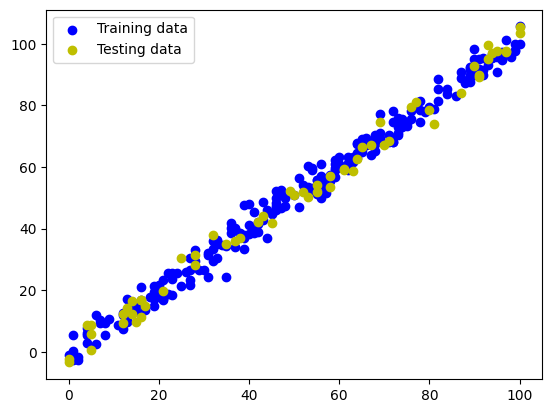

In [ ]:
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='y', label='Testing data')
plt.legend()
plt.show()

**Model Building**

In [ ]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,input_shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = ["mae"])

# train the model
epoch_number = 4
history = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=epoch_number)

Epoch 1/4


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 37.1422 - mae: 37.1422
Epoch 2/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.8762 - mae: 9.8762 
Epoch 3/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.4832 - mae: 8.4832   
Epoch 4/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9706 - mae: 2.9706 


In [ ]:
X_train.shape

(240,)

In [ ]:
tf.expand_dims(X_train, axis=-1).shape

TensorShape([240, 1])

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.26 KB)

 Trainable params: 789 (3.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,580 (6.18 KB)

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[94.23959 ],
       [79.593346],
       [98.42423 ],
       [ 5.315975],
       [95.28574 ]], dtype=float32)

In [ ]:
y_test[:5]

,y
203,92.887723
266,79.503415
152,97.001484
9,8.746748
233,89.739520


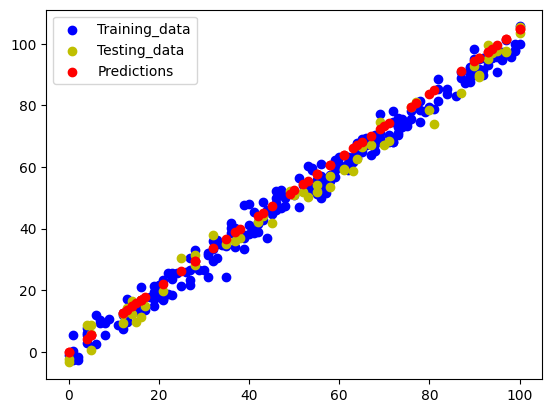

In [ ]:
plt.scatter(X_train, y_train, c='b', label='Training_data')
plt.scatter(X_test, y_test, c='y', label='Testing_data')
plt.scatter(X_test, y_pred, c='r', label='Predictions')
plt.legend()
plt.show()

In [ ]:
model.evaluate(tf.expand_dims(X_test, axis=-1), y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 3.1818 - mae: 3.1818 


[3.2673733234405518, 3.2673733234405518]

In [ ]:

# Using evaluate method
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.1818 - mae: 3.1818


[3.2673733234405518, 3.2673733234405518]

In [ ]:
# Using MAE (Mean Absolute Error)
mae = tf.reduce_mean(tf.abs(tf.cast(tf.constant(y_test), dtype=tf.float32) - tf.squeeze(y_pred)))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.2673733234405518>